# Project 1 - Dogs vs Cats

### 1. Introduction & Objectives

**Identifying Dogs and Cats with AI**

The "Dogs vs Cats" project aims to develop a machine learning model capable of effectively classifying images of dogs and cats. The project is structured into phases, starting with a basic implementation and advancing to more sophisticated enhancements such as transfer learning and data augmentation. This project provides an opportunity to deepen the understanding of core machine learning concepts, including data preprocessing, deep learning model design, and performance improvement techniques.

The first phase focuses on creating a baseline solution by implementing a simple convolutional neural network (CNN) for image classification without leveraging advanced techniques like data augmentation. After training the model, its performance will be analyzed, identifying potential challenges such as misclassified images and understanding the reasons behind these errors.

The second phase emphasizes improving the model. This involves utilizing transfer learning through a pre-trained VGG16 model and experimenting with layer freezing to enhance performance. Additionally, data augmentation techniques will be employed to diversify the training dataset and analyze their impact on the model's generalization capabilities.

**Objectives of the Project:**
1. **Image Classification:** Develop and optimize a machine learning model to distinguish between images of dogs and cats.
2. **Baseline Model Construction:** Implement a simple CNN model and analyze its initial performance.
3. **Data Management:** Prepare the image dataset by splitting it into training, validation, and test sets, and document the directory structure for efficient data handling.
4. **Transfer Learning Implementation:** Enhance the model's performance by utilizing pre-trained models and experimenting with techniques such as layer freezing.
5. **Data Augmentation:** Increase dataset diversity using at least three augmentation techniques and evaluate their effects on performance.
6. **Result Documentation and Analysis:** Compare different approaches, identify challenges, and propose solutions following the CRISP-DM methodology.
7. **Future Development Ideas:** Assess the project's outcomes and identify new strategies to improve the model's performance further.

Through this project, we will gain hands-on experience with deep learning implementation and learn to evaluate the impact of various techniques on image processing and classification tasks.

---

### 2. Data Understanding

**Data Understanding**

The dataset used in this project originates from the well-known "Dogs vs. Cats" competition on Kaggle. This dataset contains labeled images of dogs and cats, offering an excellent foundation for binary classification tasks in computer vision. The images are diverse, varying in resolution, perspective, and lighting conditions, which makes the dataset a practical choice for developing and testing deep learning models.

### Dataset Overview:
1. **Categories**:
   The dataset includes two main categories: **dogs** and **cats**. Each image is clearly labeled with the corresponding class.

2. **Format**:
   Images are provided in JPEG format, making them compatible with most image processing libraries and frameworks.

3. **Size**:
   The original dataset contains 25,000 images (12,500 for each category). However, in this project, a smaller subset will be used to streamline experimentation and training.

4. **Challenges in the Data**:
   - **Visual Variability**: Images contain variations in scale, orientation, backgrounds, and lighting conditions, introducing real-world complexities to the classification task.
   - **Class Imbalance**: While the dataset is generally balanced, care must be taken to ensure subsets maintain a similar distribution for meaningful training, validation, and testing.

5. **Data Usage in the Project**:
   - **Training Set**: Used to train the model to distinguish between dog and cat images.
   - **Validation Set**: Helps evaluate the model’s performance during training and fine-tune hyperparameters.
   - **Test Set**: Provides an independent evaluation to assess the model’s final performance.

6. **Directory Structure**:
   To facilitate the project, the dataset will be organized into a structured directory system.
   ```
   data/
     test/
       dog/
       cat/
     train/
       dog/
       cat/
     validation/
       dog/
       cat/
   ```

### Visual Exploration:
- Before delving into model training, example images from both categories will be displayed to understand the dataset’s diversity and confirm its proper loading. This step ensures that data preprocessing is correctly implemented and provides insight into any anomalies or inconsistencies in the data.

### Key Insights for Modeling:
- The dataset’s high variability requires robust preprocessing and augmentation techniques to help the model generalize effectively.
- A careful split into training, validation, and test sets will ensure that the evaluation metrics reflect the model's true performance.
- Potential issues such as mislabeled images or noise in the dataset will need to be monitored and addressed as part of the data analysis process.

By thoroughly understanding the data, we can tailor preprocessing steps and model design to maximize classification performance while addressing challenges posed by the dataset's complexity.

#### 2.1 Environment Setup

To streamline this notebook, we will supress TensorFlow warnings, and set the Keras backend to TensorFlow. We will also provide a way to disable the GPU. Just set the flag `use_gpu` to `False` to disable the GPU.

In [1]:
# Supress TensorFlow warnings and set the Keras backend to TensorFlow
import os
import sys

os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Redirect stderr to null
sys.stderr = open(os.devnull, 'w')

# Set the flag to disable the GPU
use_gpu = True

In [2]:
if not use_gpu:
    # Disable the GPU
    os.environ['CUDA_VISIBLE_DEVICES'] = ''

    print("GPU is disabled.")
else:
    # Set the GPU device
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'

    # Optimize GPU memory allocation
    os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

    # Enable XLA JIT compilation
    os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices"

    # Disable unnecessary logging
    os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

    # Maximize GPU usage
    os.environ["TF_ENABLE_GPU_GARBAGE_COLLECTION"] = "false"

    # Advanced GPU optimizations
    os.environ["TF_GPU_THREAD_MODE"] = "gpu_private"
    os.environ["TF_FORCE_UNIFIED_MEMORY"] = "1"
    os.environ["TF_ENABLE_AUTO_MIXED_PRECISION"] = "1"

    print("GPU is enabled.")

GPU is enabled.


#### 2.2 Importing Libraries

Next we will import the necessary libraries for this project.

1. **`numpy as np`**
   Used for numerical computations and handling arrays; a fundamental library in scientific computing.

2. **`from pathlib import Path`**
   Provides a convenient way to handle filesystem paths and directories in a platform-independent manner.

3. **`import matplotlib.pyplot as plt`**
   A plotting library for visualizing data, commonly used for displaying images and graphs.

4. **`from shutil import rmtree, copyfile`**
   - `rmtree`: Used to delete an entire directory tree.
   - `copyfile`: Copies a file from one location to another.

5. **`from keras.api.models import load_model`**
   Loads pre-trained models saved in the Keras format for transfer learning or continued training.

6. **`from keras.src import Sequential, Input, Model`**
   - `Sequential`: Simplifies the creation of linear (layer-by-layer) models.
   - `Input`: Specifies input dimensions for a model.
   - `Model`: A class for defining models with more complex architectures or functional API.

7. **`from keras.src.callbacks import ModelCheckpoint`**
   Saves the model during training whenever validation metrics improve, enabling checkpoints for recovery or analysis.

8. **`from keras.src.utils import image_dataset_from_directory`**
   Generates image datasets from a directory structure, handling preprocessing and splitting data for training/validation.

9. **`from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling`**
   - `Conv2D`: A convolutional layer for extracting spatial features from images.
   - `MaxPooling2D`: A pooling layer to reduce spatial dimensions while retaining important features.
   - `Flatten`: Converts multidimensional data into a 1D vector for fully connected layers.
   - `Dense`: Fully connected layers for classification or regression tasks.
   - `Rescaling`: Scales input data to a specified range (e.g., normalization).

In [18]:
# Importing Libraries
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from shutil import rmtree, copyfile
from keras.api.models import load_model
from keras.src import Sequential, Input, Model
from keras.src.callbacks import ModelCheckpoint
from keras.src.utils import image_dataset_from_directory
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling

#### 2.3 Creating the Folder Structure

Before we can load the data, we will need to split the data into training, validation and test folders for easier processing. We will use the following directory structure:

    Training set: Inputs/dogs_vs_cats/train
    1,000 images of cats, and 1,000 images of dogs

    Validation set: Inputs/dogs_vs_cats/valid
    500 images of cats, and 500 images of dogs

    Test set: Inputs/dogs_vs_cats/test
    1,000 images of cats, and 1,000 images of dogs

We will use the following Python code to create the subsets from the original dataset.

In [4]:
original_dir = Path('../Inputs/dogs_vs_cats_orig/train')
new_base_dir = Path('../Inputs/dogs_vs_cats')

# Remove the new_base_dir if it already exists
if new_base_dir.exists():
    rmtree(new_base_dir)

# Define a function to create the new directory structure
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)  # Create directories
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            copyfile(src=original_dir / fname, dst=dir / fname)


# Create the subsets
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

#### 2.4 Loading the Data

Now that we have created the folder structure, we can load the data using the `image_dataset_from_directory` function from Keras. We will create the training, validation and test datasets using the following code.

In [6]:
# Load the data
train_dataset = image_dataset_from_directory(new_base_dir / 'train', image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / 'validation', image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / 'test', image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


We have now loaded the data into the `train_dataset`, `validation_dataset` and `test_dataset` variables. Let's visualise some of the images from the training dataset to better understand the data.

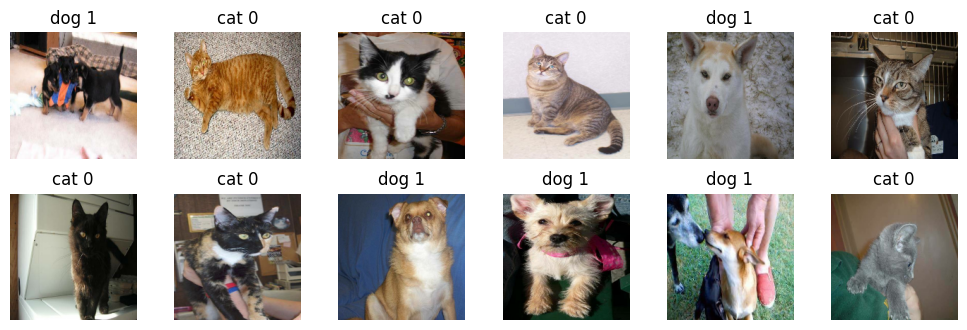

In [7]:
# Visualize the data
plt.figure(figsize=(10, 5))
for images, labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"cat {labels[i]}" if labels[i].numpy() == 0 else f"dog {labels[i]}")
        plt.axis("off")

plt.tight_layout()
plt.show()

Here we can see some of the images from the training dataset. The labels above the images indicate whether the image is a cat or a dog. For clarity purposes, we have included the "dog" and "cat" labels above the images, but in the dataset, the labels are represented as 0 for cats and 1 for dogs.

### 3. First Model: Convolutional Neural Network (CNN)

For our first model, we will build a simple Convolutional Neural Network, without any data augmentation. We will use the following architecture for the model:

        Input layer: 180x180 RGB image
        Rescaling layer: Rescale the pixel values to [0, 1]
        Convolutional 2D layer: 32 filters, 3x3 kernel, ReLU activation
        Max pooling 2D layer: 2x2 pool size
        Convolutional 2D layer: 64 filters, 3x3 kernel, ReLU activation
        Max pooling 2D layer: 2x2 pool size
        Convolutional 2D layer: 128 filters, 3x3 kernel, ReLU activation
        Max pooling 2D layer: 2x2 pool size
        Convolutional 2D layer: 256 filters, 3x3 kernel, ReLU activation
        Max pooling 2D layer: 2x2 pool size
        Convolutional 2D layer: 256 filters, 3x3 kernel, ReLU activation
        Flatten layer
        Output layer: 1 unit, Sigmoid activation

This model should be able to achieve a decent accuracy on the Dogs vs Cats dataset. Let's build the model using the following code.

In [8]:
# Build the model
inputs = Input(shape=(180, 180, 3))

x = Rescaling(1. / 255)(inputs)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = Flatten()(x)

outputs = Dense(1, activation="sigmoid", name="Output")(x)

model = Model(inputs=inputs, outputs=outputs, name="Dogs_vs_Cats_CNN")

model.summary()

Model: "Dogs_vs_Cats_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

The CNN model has been successfully built. We can see the summary of the model above, which shows the architecture of the model, including the number of parameters in each layer. The model has a total of 991,041 trainable parameters. We can now move onto compiling and training the model.

### 4. Compiling and Training the Model

We will compile the CNN model using the `Adam` optimizer and the `binary crossentropy` loss function, which is appropriate for binary classification tasks. The model's performance will be measured using `accuracy` as the primary metric. During training, we will save the model's best version based on the validation loss using a `ModelCheckpoint` callback. The model will be trained for `30 epochs` using the fit method, with training performed on the training dataset and validation on the validation dataset.

In [9]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define the callbacks
callbacks = [
    ModelCheckpoint(
        filepath="../Models/Dogs_vs_Cats_CNN.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=1
    )
]

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5042 - loss: 0.6961
Epoch 1: val_loss improved from inf to 0.69127, saving model to ../Models/Dogs_vs_Cats_CNN.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.5044 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.6913
Epoch 2/30
19/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4869 - loss: 0.6934
Epoch 2: val_loss improved from 0.69127 to 0.68909, saving model to ../Models/Dogs_vs_Cats_CNN.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5067 - loss: 0.6928 - val_accuracy: 0.5170 - val_loss: 0.6891
Epoch 3/30
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5636 - loss: 0.6832
Epoch 3: val_loss improved from 0.68909 to 0.67960, saving model to ../Models/Dogs_vs_Cats_CNN.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5653 - loss: 0.6827 - val_accuracy: 0.5750 - val_loss: 0.6796
Epoch 4/30
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5657 - loss: 0.6756
Epoch 4: va

The CNN model was successfully compiled and trained. The training progress was recorded in the `history` variable, which contains the metrics for both training and validation across all epochs.

Analysis of the training history shows that the validation loss decreased steadily up to the 7th epoch but began increasing afterward. This suggests that the model started overfitting the training data after the 7th epoch.

Thanks to the `ModelCheckpoint` callback, the best version of the model—determined by the lowest validation loss—was saved. This ensures that the saved model is the most optimal for evaluation. We can now proceed to test the model on the test dataset.

### 5. Model Evaluation

Before we start evaluating the model on the test dataset, let's visualize the training history to better understand the model's performance during training.

#### 5.1 Visualizing the Training History

We will plot the training and validation accuracy and loss over the epochs to visualize the model's performance during training. This will help us identify trends such as overfitting, underfitting, or convergence issues. We will also highlight the 7th epoch to indicate where the model started to overfit the training data.

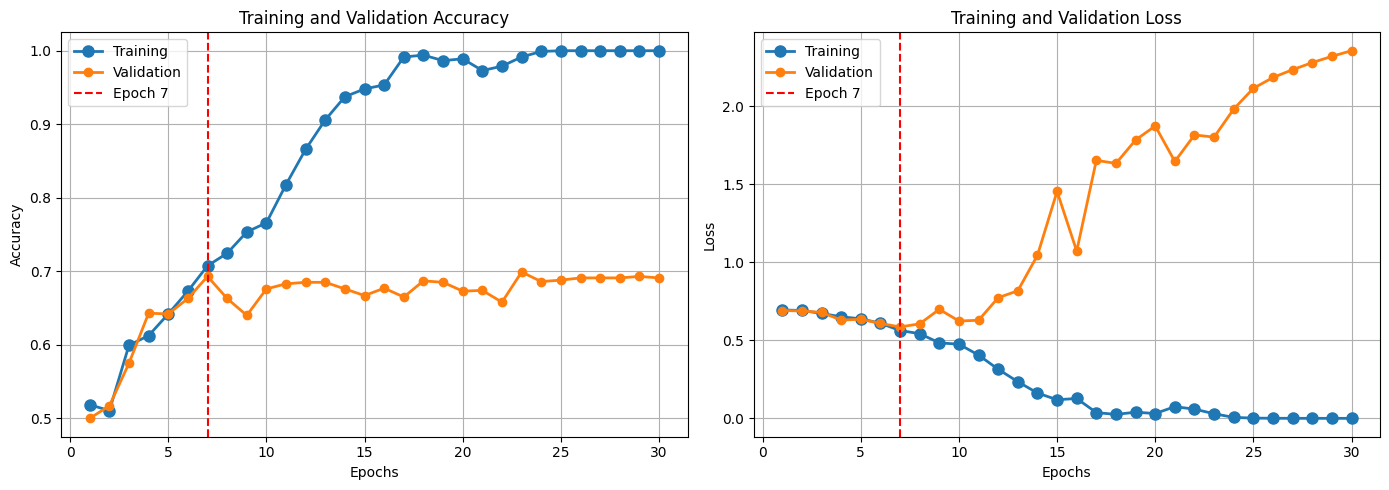

In [13]:
# Extract data from history
epochs = range(1, len(history.history["accuracy"]) + 1)

# Create subplots for accuracy and loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Highlight epoch 7
highlight_epoch = 7
highlight_color = "red"

# Plot accuracy and loss
for ax, metric, title, ylabel in zip(
        axes,
        [("accuracy", "val_accuracy"), ("loss", "val_loss")],
        ["Training and Validation Accuracy", "Training and Validation Loss"],
        ["Accuracy", "Loss"]
):
    ax.plot(epochs, history.history[metric[0]], "o-", label="Training", markersize=8, linewidth=2)
    ax.plot(epochs, history.history[metric[1]], "o-", label="Validation", linewidth=2)

    # Highlight the 7th epoch
    ax.axvline(highlight_epoch, linestyle="--", color=highlight_color, label=f"Epoch {highlight_epoch}")
    ax.set_title(title)
    ax.set_xlabel("Epochs")
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

From the plots, we observe that the training accuracy steadily increases over the epochs, reaching nearly 100% by the end of training, while the validation accuracy improves until epoch 7 and then plateaus at around 70%. The training loss consistently decreases as expected, but the validation loss reaches its minimum at epoch 7 and begins to increase significantly afterward.

This divergence between training and validation metrics indicates that the model starts to overfit to the training data after epoch 7. While it continues to perform well on the training set, its ability to generalize to unseen data deteriorates beyond this point.

The increasing validation loss despite stagnant validation accuracy highlights overfitting. Techniques such as early stopping, dropout, or data augmentation could help prevent the model from overfitting and improve its generalization to validation and test data.

Now, let's evaluate the model on the test dataset to determine its performance on unseen data.

#### 5.1 Evaluating the Model

For evaluating the model, we will load the best version of the model we saved during training using the `ModelCheckpoint` callback. We will then evaluate the model on the test dataset to determine its performance on unseen data.

In [16]:
# Load the best model
best_model = load_model("../Models/Dogs_vs_Cats_CNN.keras")

# Evaluate the model on the test dataset
test_loss, test_accuracy = best_model.evaluate(test_dataset, verbose=0)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")

Test Loss: 0.6191, Test Accuracy: 67.35%


The model was evaluated on the test dataset and achieved the following results:
- **Test Loss:** 0.6191
- **Test Accuracy:** 67.35%

The test loss reflects the average error in the model's predictions as measured by the binary cross-entropy loss function. The accuracy indicates that the model correctly classified 67.35% of the test samples.

These results suggest that while the model learned to some extent, its generalization to unseen data is limited, likely due to overfitting during training. To improve performance, further steps such as increasing the training data size, applying regularization techniques like dropout, or fine-tuning the model's architecture may be beneficial.

Let's take a look at some of the images the model incorrectly identified to gain insights into its performance.

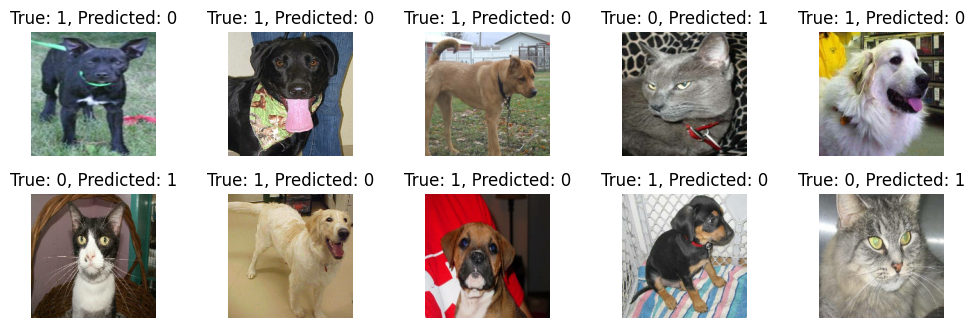

In [23]:
# Get the predictions from the model
predictions = model.predict(test_dataset, verbose=0)
predicted_labels = (predictions > 0.5).astype("int32")  # Convert probabilities to binary labels (0 or 1)

# Extract true labels and images from the dataset
true_labels = []
images = []

for image_batch, label_batch in test_dataset:
    images.extend(image_batch.numpy())  # Collect images
    true_labels.extend(label_batch.numpy())  # Collect true labels

true_labels = np.array(true_labels)

# Identify misclassified images
wrong_indices = np.where(predicted_labels.flatten() != true_labels)[0]

# Display some of the wrongly identified images
num_images = min(10, len(wrong_indices))  # Limit to 9 images for display
plt.figure(figsize=(10, 5))

for i, idx in enumerate(wrong_indices[:num_images]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[idx].astype("uint8"))  # Convert image data to displayable format
    plt.title(f"True: {true_labels[idx]}, Predicted: {predicted_labels[idx][0]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Possible Reasons for Incorrect Predictions

1. **Ambiguous Features:**
   - Some images may not have clear visual cues distinguishing cats from dogs. For instance:
     - The dog in the first row, first column (True: 1, Predicted: 0) might appear ambiguous due to its posture or lack of distinct "dog-like" features.
     - The cat in the second row, last column (True: 0, Predicted: 1) might have been misclassified due to its large size or fur pattern resembling certain dogs.

2. **Lighting and Background:**
   - Poor lighting or cluttered backgrounds might confuse the model. For example:
     - The second row, third column image (True: 1, Predicted: 0) features a dog in an indoor environment with muted colors, which might obscure its features.

3. **Class Similarities:**
   - Cats and dogs share some visual similarities, such as fur patterns or facial shapes, which might lead to misclassifications. For example:
     - The cat in the first row, fourth column (True: 0, Predicted: 1) may have been misclassified due to its neutral color and lack of prominent cat features.

4. **Perspective and Cropping:**
   - Unusual camera angles or poorly cropped images can obscure the distinguishing features of the animal. For example:
     - The dog in the first row, second column (True: 1, Predicted: 0) is cropped in a way that doesn't emphasize its full structure, making it harder for the model to classify.

5. **Overfitting to Training Data:**
   - The model might have overfitted certain patterns in the training set, leading it to misinterpret unseen data. For instance, it may incorrectly prioritize certain background elements or assume specific color patterns belong to a certain class.

6. **Model Bias:**
   - The model may be biased towards certain attributes that appeared more frequently in the training data. For example:
     - The dog in the second row, fourth column (True: 1, Predicted: 0) may have been misclassified because the model might associate certain fur patterns or colors with cats due to training bias.

7. **Small Details Confusing the Model:**
   - Small details like collars, accessories, or even objects in the background might divert the model's focus. For instance:
     - The dog in the first row, fifth column (True: 1, Predicted: 0) may have been misclassified due to its collar blending with the background.

By analyzing these misclassified images, we can identify potential areas for improvement in the model's training data, architecture, or preprocessing steps. Addressing these issues could enhance the model's performance and generalization capabilities.

In the next section, we will explore a more advanced model—Transfer Learning using a pre-trained model—to leverage existing knowledge and improve the Dogs vs Cats classification task.

### 6. Second Model: Transfer Learning with a Pre-trained VGG16 Model

In the second approach, we will implement **Transfer Learning** by utilizing a pre-trained VGG16 model. Transfer Learning allows us to take advantage of the knowledge the model has gained from training on a large dataset like ImageNet and apply it to our specific task of classifying dogs and cats. This method is particularly effective when working with limited training data, as it improves performance by leveraging pre-learned features.

To retain the pre-trained model's feature extraction capabilities, we will freeze its convolutional base and train only the classifier on top of it. This ensures that the model's existing knowledge is preserved while adapting the classification layer to our dataset.

Additionally, we will incorporate **data augmentation** techniques, such as rotation, flipping, and zooming, to make the model more robust and capable of generalizing to unseen data. This helps reduce overfitting and improves the model's ability to handle variability in real-world images.